# **Diploma Thesis**

Ονοματεπώνυμο: Ειρήνη Δόντη / Full Name: Eirini Donti


## Repository Data Forecasting

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
df = pd.read_csv('UA & GA4 Kalippos_(1_1_18-31_12_23) New Users - Date_Time series.csv')

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%b-%y')

#print(df)

# Set 'Date' as the index
df.set_index('Date', inplace=True)

# Resample data to weekly frequency
weekly_data = df.resample('W').mean()

weekly_data.reset_index(inplace=True)

#print(weekly_data.to_markdown())


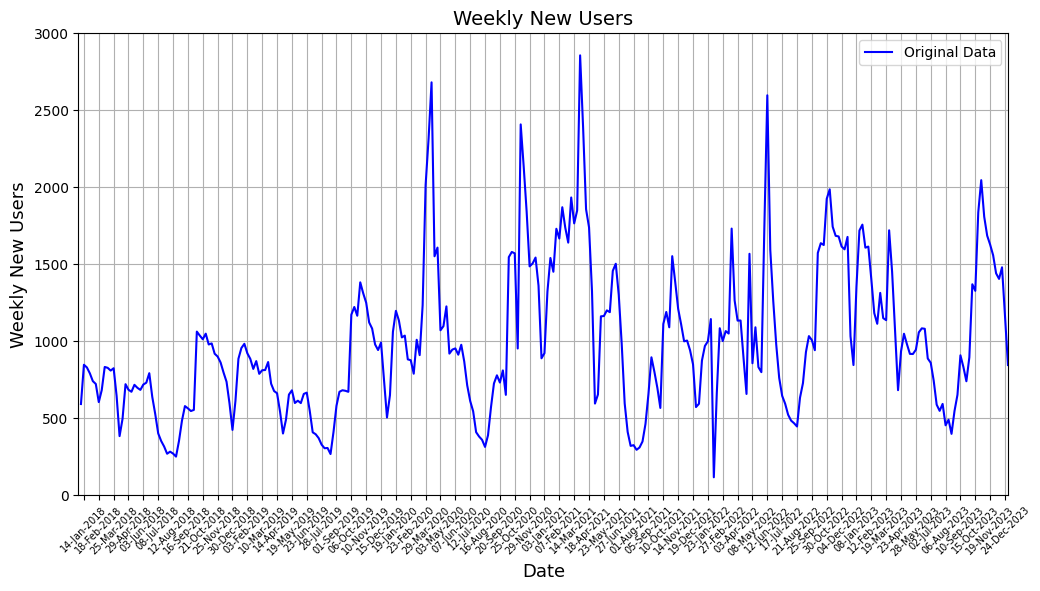

In [ ]:
# Create a plot to compare the forecast with the actual test data
plt.figure(figsize=(12,6))

# Create the plot
plt.plot(weekly_data['Date'], weekly_data['New Users'], label='Original Data', color='blue')

# Format the plot
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=7*5))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b-%Y'))

plt.xticks(rotation=45, fontsize = 7)
plt.title('Weekly New Users', fontsize=14)
plt.xlabel('Date', fontsize=13)
plt.ylabel('Weekly New Users', fontsize=13)
plt.xlim([pd.Timestamp('2018-01-01'), pd.Timestamp('2024-01-01')])
plt.ylim(0, 3000)
plt.legend()
plt.grid()
plt.show()


### Time Series Forecasting With Statistical Methods

#### SARIMAX

In [ ]:
!pip install pmdarima
from pmdarima.arima import auto_arima

In [ ]:
stepwise_fit = auto_arima(weekly_data['New Users'], start_p = 1, start_q = 1,
                          max_p = 1, max_q = 1, m = 52,
                          start_P = 0, seasonal = True,
                          d = None, D = 1, trace = True,
                          error_action ='ignore',   # we don't want to know if an order does not work
                          suppress_warnings = True,  # we don't want convergence warnings
                          stepwise = True)           # set to stepwise

# To print the summary
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[52] intercept   : AIC=inf, Time=48.66 sec
 ARIMA(0,0,0)(0,1,0)[52] intercept   : AIC=3966.370, Time=0.35 sec
 ARIMA(1,0,0)(1,1,0)[52] intercept   : AIC=3724.943, Time=17.87 sec
 ARIMA(0,0,1)(0,1,1)[52] intercept   : AIC=inf, Time=19.96 sec
 ARIMA(0,0,0)(0,1,0)[52]             : AIC=3973.949, Time=0.19 sec
 ARIMA(1,0,0)(0,1,0)[52] intercept   : AIC=3784.199, Time=0.82 sec
 ARIMA(1,0,0)(2,1,0)[52] intercept   : AIC=inf, Time=64.58 sec
 ARIMA(1,0,0)(1,1,1)[52] intercept   : AIC=inf, Time=22.55 sec
 ARIMA(1,0,0)(0,1,1)[52] intercept   : AIC=inf, Time=24.34 sec
 ARIMA(1,0,0)(2,1,1)[52] intercept   : AIC=inf, Time=111.18 sec
 ARIMA(0,0,0)(1,1,0)[52] intercept   : AIC=3918.514, Time=12.35 sec
 ARIMA(1,0,1)(1,1,0)[52] intercept   : AIC=3723.902, Time=20.25 sec
 ARIMA(1,0,1)(0,1,0)[52] intercept   : AIC=3778.630, Time=2.74 sec
 ARIMA(1,0,1)(2,1,0)[52] intercept   : AIC=3704.284, Time=99.46 sec
 ARIMA(1,0,1)(2,1,1)[52] intercept   :

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  313
Model:             SARIMAX(1, 0, 1)x(2, 1, [], 52)   Log Likelihood               -1846.142
Date:                             Tue, 30 Jul 2024   AIC                           3704.284
Time:                                     14:00:23   BIC                           3725.671
Sample:                                          0   HQIC                          3712.881
                                             - 313                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     46.4644     18.209      2.552      0.011      10.775      82.154
ar.L1          0.8101      0.038     21.296      0.000       0.736       0.885
ma.L1         -0.1540      0.056     -2.739      0.006      -0.264      -0.044
ar.S.L52      -0.6063      0.044    -13.680      0.000      -0.693      -0.519
ar.S.L104     -0.3483      0.048     -7.288      0.000      -0.442      -0.255
sigma2      7.422e+04   3885.200     19.102      0.000    6.66e+04    8.18e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.17   Jarque-Bera (JB):               353.65
Prob(Q):                              0.68   Prob(JB):                         0.00
Heteroskedasticity (H):               1.72   Skew:                             0.83
Prob(H) (two-sided):                  0.01   Kurtosis:                         8.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
# Split data into train / test sets
train = weekly_data.iloc[:len(weekly_data)-53]
#print("Train",train)
test = weekly_data.iloc[len(weekly_data)-53:]
#print("Test",test)

# Fit a SARIMAX (1, 0, 1)(2, 1, 0, 52)
model = SARIMAX(train['New Users'],
                order = (1, 0, 1),
                seasonal_order =(2, 1, 0, 52))

result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                           New Users   No. Observations:                  260
Model:             SARIMAX(1, 0, 1)x(2, 1, [], 52)   Log Likelihood               -1483.254
Date:                             Tue, 06 Aug 2024   AIC                           2976.507
Time:                                     11:33:38   BIC                           2993.195
Sample:                                          0   HQIC                          2983.255
                                             - 260                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8967      0.033     27.391      0.000       0.833       0.961
ma.L1         -0.2498      0.055     -4.512      0.000      -0.358      -0.141
ar.S.L52      -0.4828      0.056     -8.647      0.000      -0.592      -0.373
ar.S.L104     -0.3715      0.083     -4.500      0.000      -0.533      -0.210
sigma2      8.228e+04   5492.889     14.979      0.000    7.15e+04     9.3e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):               292.36
Prob(Q):                              0.81   Prob(JB):                         0.00
Heteroskedasticity (H):               2.52   Skew:                             0.87
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

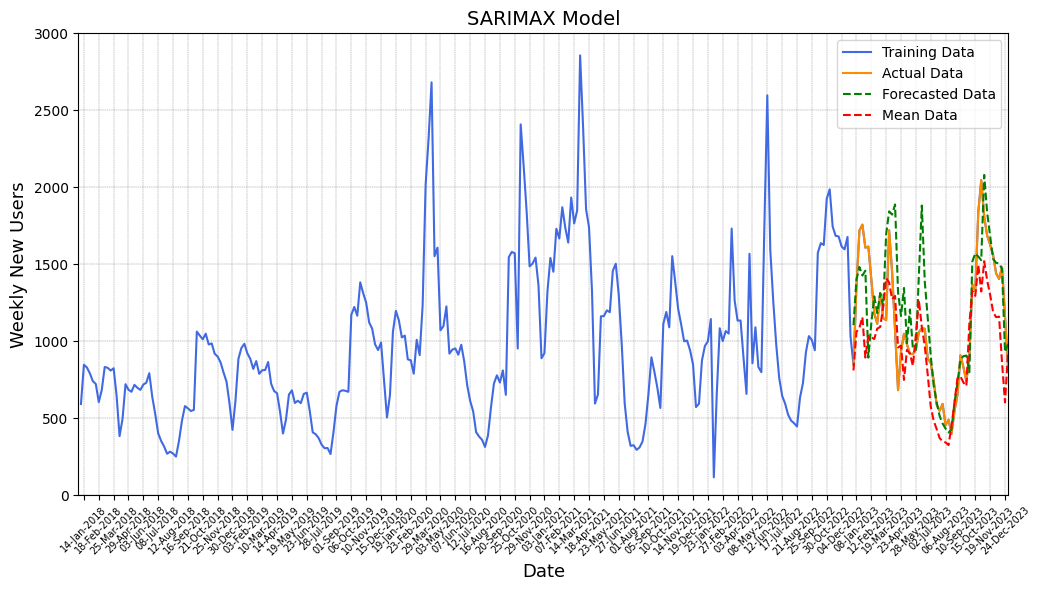

RMSE real-prediction: 284.2771938191711
MAE real-prediction: 198.5158531827029
RMSE real-mean: 298.77072717589346
MAE real-mean: 232.03517520215632


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Convert 'Date' column to datetime
weekly_data['Date'] = pd.to_datetime(weekly_data['Date'])
test['Date'] = pd.to_datetime(test['Date'])

# 'Date' is set as index for resampling
weekly_data.set_index('Date', inplace=True)

# Predictions for one-year against the test set
start = len(train)
end = len(train) + len(test) - 1
predictions = result.predict(start, end, typ='levels').rename("Predictions")

# Calculate weekly means for the years 2018-2022
weekly_data['year'] = weekly_data.index.year
df_2018_2022 = weekly_data[weekly_data['year'] <= 2022]
df_2018_2022['week'] = df_2018_2022.index.isocalendar().week
weekly_means = df_2018_2022.groupby('week')['New Users'].mean()

# Generate dates for weekly means for the year 2023
week_mean_dates = pd.date_range(start='2023-01-01', end='2023-12-31', freq="7D")
#print("Week Mean Dates\n", week_mean_dates)

# Create a plot to compare the forecast with the actual test data
plt.figure(figsize=(12, 6))
plt.plot(weekly_data.index, weekly_data['New Users'], label='Training Data', color='royalblue')
plt.plot(test['Date'], test['New Users'], label='Actual Data', color='darkorange')
plt.plot(test['Date'], predictions, label='Forecasted Data', color='green', linestyle='dashed')
plt.plot(week_mean_dates, weekly_means.values, color='red', linestyle='--', label='Mean Data')

plt.xticks(rotation=45, fontsize = 7)
plt.title('SARIMAX Model', fontsize=14)
plt.xlabel('Date', fontsize=13)
plt.ylabel('Weekly New Users', fontsize=13)
plt.xlim([pd.Timestamp('2018-01-01'), pd.Timestamp('2024-01-01')])
plt.ylim(0, 3000)
# Format the plot
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=7*5))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b-%Y'))
plt.legend()
plt.grid(color='grey', linestyle='--', linewidth=0.3)
plt.show()

# Calculate the mean squared error
rmse = mean_squared_error(test['New Users'], predictions, squared=False)
print('RMSE real-prediction:', rmse)

# Calculate the mean absolute error
mae = mean_absolute_error(test['New Users'], predictions)
print('MAE real-prediction:', mae)

rmse_mean = mean_squared_error(test['New Users'], weekly_means, squared=False)
print('RMSE real-mean:', rmse_mean)

mae_mean = mean_absolute_error(test['New Users'], weekly_means)
print('MAE real-mean:', mae_mean)


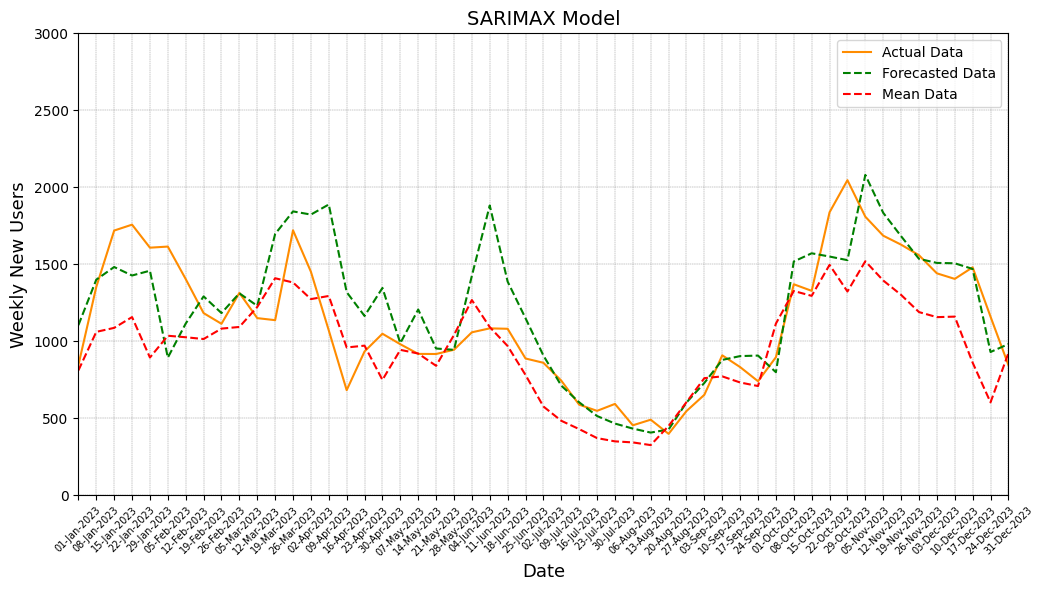

In [ ]:
# Create a plot to compare the forecast with the actual test data
plt.figure(figsize=(12, 6))
plt.plot(test['Date'], test['New Users'], label='Actual Data', color='darkorange')
plt.plot(test['Date'], predictions, label='Forecasted Data', color='green', linestyle='dashed')
plt.plot(week_mean_dates, weekly_means.values, color='red', linestyle='--', label='Mean Data')

plt.xticks(rotation=45, fontsize = 7)
plt.title('SARIMAX Model', fontsize=14)
plt.xlabel('Date', fontsize=13)
plt.ylabel('Weekly New Users', fontsize=13)
plt.xlim([pd.Timestamp('2023-01-01'), pd.Timestamp('2023-12-31')])
plt.ylim(0, 3000)
# Format the plot
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=7))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b-%Y'))
plt.legend()
plt.grid(color='grey', linestyle='--', linewidth=0.3)
plt.show()

A SARIMAX(p, d, q)(P, D, Q, m) model is defined by seven parameters:

p : autoregressive order

d : difference order

q : moving average order

P: The seasonal autoregressive (SAR) order.

D: The seasonal differencing order.

Q: The seasonal moving average (SMA) order.

m: The length of the seasonal cycle.

#### Exponential Smoothing

In [ ]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
import pandas
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.tsa.api as smt
import warnings
warnings.filterwarnings('ignore')

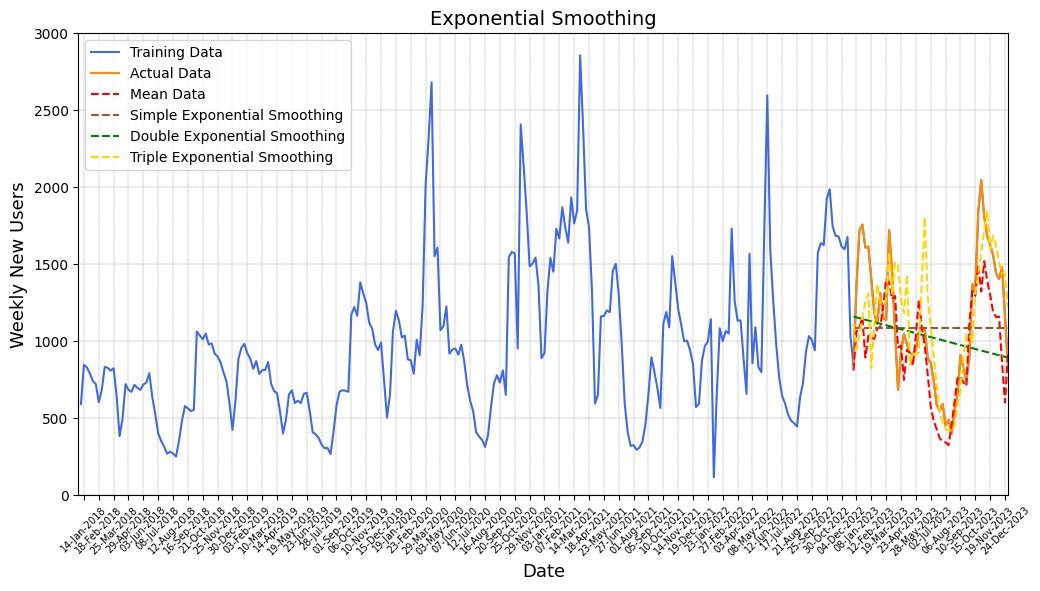

SES Parameters: {'alpha': 0.9191836734693878}, Optimized SES MAE: 339.12167332240637
SES Model Summary:
                       SimpleExpSmoothing Model Results                       
Dep. Variable:              New Users   No. Observations:                  260
Model:             SimpleExpSmoothing   SSE                       20440048.210
Optimized:                      False   AIC                           2934.805
Trend:                           None   BIC                           2941.926
Seasonal:                        None   AICC                          2934.961
Seasonal Periods:                None   Date:                 Wed, 28 Aug 2024
Box-Cox:                        False   Time:                         23:56:10
Box-Cox Coeff.:                  None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            

In [ ]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import ParameterGrid

# Split data into train / test sets
df_train = weekly_data.iloc[:len(weekly_data)-53]
df_test = weekly_data.iloc[len(weekly_data)-53:]

forecast_periods = 53

# Define a range of possible alpha, beta, and gamma values for Grid Search
param_grid_ses = {'alpha': np.linspace(0.01, 1, 50)}
param_grid_des = {'alpha': np.linspace(0.01, 1, 50), 'beta': np.linspace(0.01, 1, 50)}
param_grid_tes = {'alpha': np.linspace(0.01, 1, 50), 'beta': np.linspace(0.01, 1, 50), 'gamma': np.linspace(0.01, 1, 50)}

# Simple Exponential Smoothing with Grid Search
best_mae_ses = float('inf')
best_params_ses = None

for params in ParameterGrid(param_grid_ses):
    model = sm.tsa.SimpleExpSmoothing(df_train['New Users']).fit(smoothing_level=params['alpha'], optimized=False)
    forecast = model.forecast(forecast_periods)
    mae = mean_absolute_error(df_test['New Users'], forecast)

    if mae < best_mae_ses:
        best_mae_ses = mae
        best_params_ses = params

model_simple = sm.tsa.SimpleExpSmoothing(df_train['New Users']).fit(smoothing_level=best_params_ses['alpha'], optimized=False)
forecast_simple = model_simple.forecast(forecast_periods)

# Double Exponential Smoothing with Grid Search
best_mae_des = float('inf')
best_params_des = None

for params in ParameterGrid(param_grid_des):
    model = sm.tsa.ExponentialSmoothing(df_train['New Users'], trend='add').fit(smoothing_level=params['alpha'], smoothing_slope=params['beta'], optimized=False)
    forecast = model.forecast(forecast_periods)
    mae = mean_absolute_error(df_test['New Users'], forecast)

    if mae < best_mae_des:
        best_mae_des = mae
        best_params_des = params

model_double = sm.tsa.ExponentialSmoothing(df_train['New Users'], trend='add').fit(smoothing_level=best_params_des['alpha'], smoothing_slope=best_params_des['beta'], optimized=False)
forecast_double = model_double.forecast(forecast_periods)

# Triple Exponential Smoothing with Grid Search
best_mae_tes = float('inf')
best_params_tes = None

for params in ParameterGrid(param_grid_tes):
    model = sm.tsa.ExponentialSmoothing(df_train['New Users'], trend='add', seasonal='add', seasonal_periods=53).fit(smoothing_level=params['alpha'], smoothing_slope=params['beta'], smoothing_seasonal=params['gamma'], optimized=False)
    forecast = model.forecast(forecast_periods)
    mae = mean_absolute_error(df_test['New Users'], forecast)

    if mae < best_mae_tes:
        best_mae_tes = mae
        best_params_tes = params

model_triple = sm.tsa.ExponentialSmoothing(df_train['New Users'], trend='add', seasonal='add', seasonal_periods=53).fit(smoothing_level=best_params_tes['alpha'], smoothing_slope=best_params_tes['beta'], smoothing_seasonal=best_params_tes['gamma'], optimized=False)
forecast_triple = model_triple.forecast(forecast_periods)

# Plot the original and smoothed time series with forecast
plt.figure(figsize=(12, 6))
plt.plot(weekly_data.index, weekly_data['New Users'], label='Training Data', color='royalblue')
plt.plot(test['Date'], test['New Users'], label='Actual Data', color='darkorange')
plt.plot(week_mean_dates, weekly_means.values, color='red', linestyle='--', label='Mean Data')
plt.plot(df_test.index,list(forecast_simple), label='Simple Exponential Smoothing', color='sienna', linestyle='dashed')
plt.plot(df_test.index,list(forecast_double), label='Double Exponential Smoothing', color='green', linestyle='dashed')
plt.plot(df_test.index, list(forecast_triple), label='Triple Exponential Smoothing', color='gold', linestyle='dashed')

plt.xticks(rotation=45, fontsize = 7)
plt.title('Exponential Smoothing', fontsize=14)
plt.xlabel('Date', fontsize=13)
plt.ylabel('Weekly New Users', fontsize=13)
plt.xlim([pd.Timestamp('2018-01-01'), pd.Timestamp('2024-01-01')])
plt.ylim(0, 3000)
# Format the plot
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=7*5))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b-%Y'))
plt.legend()
plt.grid(color='grey', linestyle='--', linewidth=0.3)
plt.show()

# Print best parameters and model summaries
print(f"SES Parameters: {best_params_ses}, Optimized SES MAE: {best_mae_ses}")
print("SES Model Summary:")
print(model_simple.summary())

print(f"\nDES Parameters: {best_params_des}, Optimized DES MAE: {best_mae_des}")
print("DES Model Summary:")
print(model_double.summary())

print(f"\nTES Parameters: {best_params_tes}, Optimized TES MAE: {best_mae_tes}")
print("TES Model Summary:")
print(model_triple.summary())

# Evaluate the forecasts using RMSE
rmse_simple = mean_squared_error(df_test['New Users'], forecast_simple, squared=False)
rmse_double = mean_squared_error(df_test['New Users'], forecast_double, squared=False)
rmse_triple = mean_squared_error(df_test['New Users'], forecast_triple, squared=False)

print(f"RMSE Simple (Real-Forecast): {rmse_simple}")
print(f"RMSE Double (Real-Forecast): {rmse_double}")
print(f"RMSE Triple (Real-Forecast): {rmse_triple}")

# Evaluate the forecasts using MAE
mae_simple = mean_absolute_error(df_test['New Users'], forecast_simple)
mae_double = mean_absolute_error(df_test['New Users'], forecast_double)
mae_triple = mean_absolute_error(df_test['New Users'], forecast_triple)

print(f"MAE Simple (Real-Forecast): {mae_simple}")
print(f"MAE Double (Real-Forecast): {mae_double}")
print(f"MAE Triple (Real-Forecast): {mae_triple}")

# Evaluate the mean using RMSE
rmse = mean_squared_error(df_test['New Users'], weekly_means, squared=False)

print(f"RMSE (Real-Mean): {rmse}")

# Evaluate the mean using MAE
mae = mean_absolute_error(df_test['New Users'], weekly_means)

print(f"MAE (Real-Mean): {mae}")

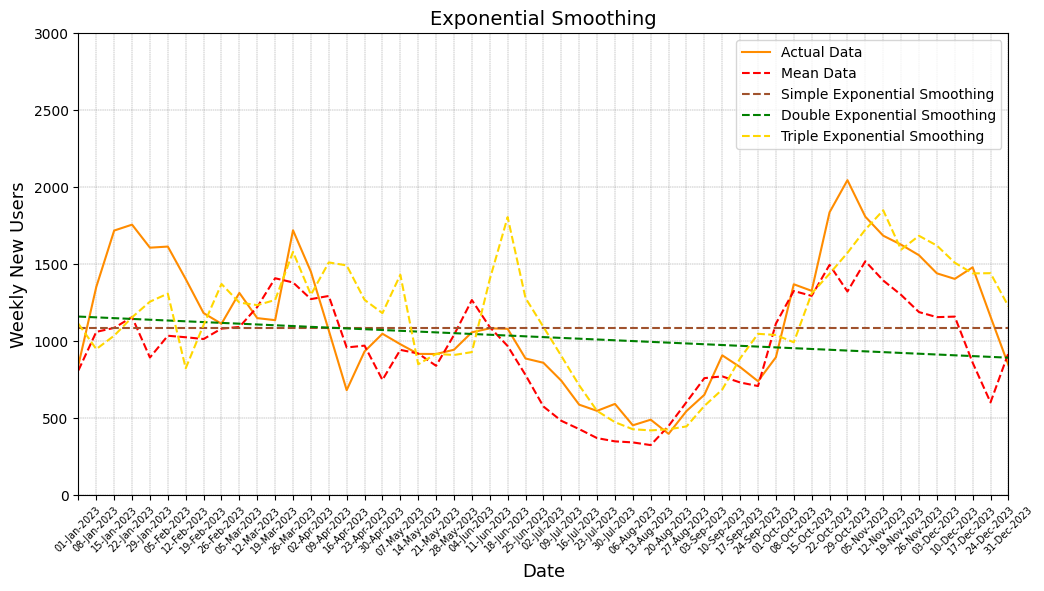

In [ ]:
# Create a plot to compare the forecast with the actual test data
plt.figure(figsize=(12, 6))
plt.plot(test['Date'], test['New Users'], label='Actual Data', color='darkorange')
plt.plot(week_mean_dates, weekly_means.values, color='red', linestyle='--', label='Mean Data')
plt.plot(df_test.index,list(forecast_simple), label='Simple Exponential Smoothing', color='sienna', linestyle='dashed')
plt.plot(df_test.index,list(forecast_double), label='Double Exponential Smoothing', color='green', linestyle='dashed')
plt.plot(df_test.index, list(forecast_triple), label='Triple Exponential Smoothing', color='gold', linestyle='dashed')

plt.xticks(rotation=45, fontsize = 7)
plt.title('Exponential Smoothing', fontsize=14)
plt.xlabel('Date', fontsize=13)
plt.ylabel('Weekly New Users', fontsize=13)
plt.xlim([pd.Timestamp('2023-01-01'), pd.Timestamp('2023-12-31')])
plt.ylim(0, 3000)
# Format the plot
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=7))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b-%Y'))
plt.legend()
plt.grid(color='grey', linestyle='--', linewidth=0.3)
plt.show()

### Time Series Forecasting With Machine Learning

In [ ]:
import json
import csv
import pandas as pd
import numpy as np
from sklearn import tree
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
df = pd.read_csv('UA & GA4 Kalippos_(1_1_18-31_12_23) New Users - Date_Time series.csv')

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%b-%y')

#print(df)

# Set 'Date' as the index
df.set_index('Date', inplace=True)

# Resample data to weekly frequency
weekly_data = df.resample('W').mean()

weekly_data.reset_index(inplace=True)

#print(weekly_data)


####Seasonal Decomposition

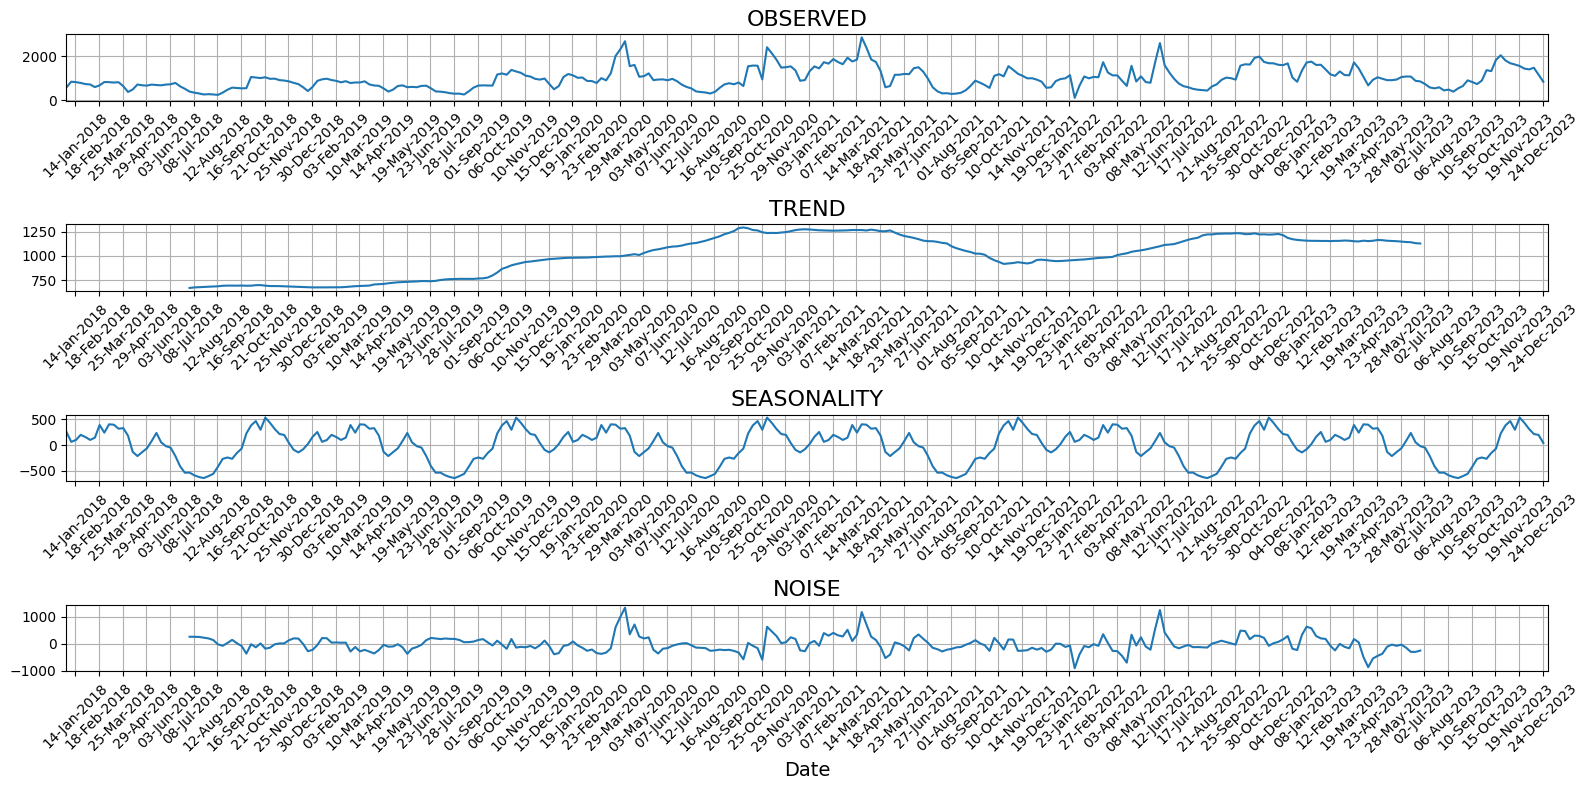

In [ ]:
#Data Analysis

def decompose_engagement_rate(weekly_data, share_type='New Users', samples='all', period=53):
    if samples == 'all':
        #Decomposing all time series timestamps
        res = seasonal_decompose(weekly_data[share_type].values, period=period)
    else:
        #Decomposing a sample of the time series
        res = seasonal_decompose(weekly_data[share_type].values[-samples:], period=period)

    observed = res.observed
    trend = res.trend
    seasonal = res.seasonal
    residual = res.resid

    dates = pd.date_range(start='2018-01-01', periods=len(weekly_data), freq='7D')

    fig, axs = plt.subplots(4, figsize=(16,8))
    plt.subplots_adjust(hspace=0.9)

    axs[0].set_title('OBSERVED', fontsize=16)
    axs[0].plot(dates, observed)
    axs[0].grid()
    axs[0].xaxis.set_major_formatter(mdates.DateFormatter('%d-%b-%Y'))
    axs[0].set_xlim([pd.Timestamp('2018-01-01'), pd.Timestamp('2024-01-01')])
    axs[0].xaxis.set_major_locator(mdates.DayLocator(interval=7*5))

    for label in axs[0].get_xticklabels():
      label.set_rotation(45)

    axs[1].set_title('TREND', fontsize=16)
    axs[1].plot(dates, trend)
    axs[1].grid()
    axs[1].xaxis.set_major_formatter(mdates.DateFormatter('%d-%b-%Y'))
    axs[1].set_xlim([pd.Timestamp('2018-01-01'), pd.Timestamp('2024-01-01')])
    axs[1].xaxis.set_major_locator(mdates.DayLocator(interval=7*5))

    for label in axs[1].get_xticklabels():
      label.set_rotation(45)

    axs[2].set_title('SEASONALITY', fontsize=16)
    axs[2].plot(dates, seasonal)
    axs[2].grid()
    axs[2].xaxis.set_major_formatter(mdates.DateFormatter('%d-%b-%Y'))
    axs[2].set_xlim([pd.Timestamp('2018-01-01'), pd.Timestamp('2024-01-01')])
    axs[2].xaxis.set_major_locator(mdates.DayLocator(interval=7*5))

    for label in axs[2].get_xticklabels():
      label.set_rotation(45)

    axs[3].set_title('NOISE', fontsize=16)
    axs[3].plot(dates, residual)
    axs[3].grid()
    axs[3].xaxis.set_major_formatter(mdates.DateFormatter('%d-%b-%Y'))
    axs[3].set_xlim([pd.Timestamp('2018-01-01'), pd.Timestamp('2024-01-01')])
    axs[3].xaxis.set_major_locator(mdates.DayLocator(interval=7*5))
    axs[3].set_xlabel('Date', fontsize=14)

    for label in axs[3].get_xticklabels():
      label.set_rotation(45)

    plt.tight_layout()
    plt.show()

    #trend_df = pd.DataFrame({'Date': dates, 'Trend': trend})
    #trend_sorted = trend_df.sort_values(by='Trend', ascending=True)
    #print(trend_df.to_markdown())

decompose_engagement_rate(weekly_data, samples='all', period=53)


####Autocorrelation

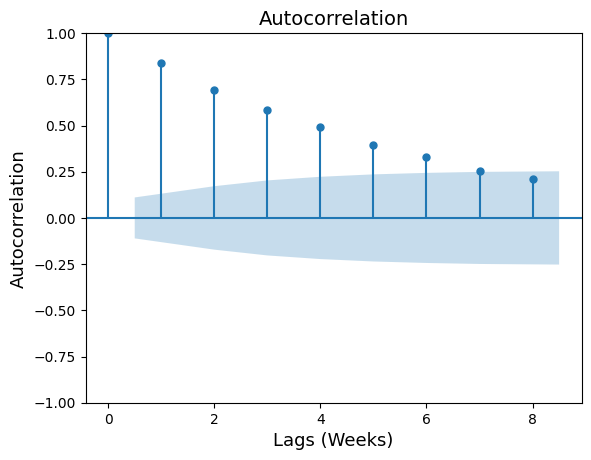

In [ ]:
# ACF Plotting

from statsmodels.graphics.tsaplots import plot_acf
plot_acf(weekly_data['New Users'].values, lags = 8)
plt.title("Autocorrelation", fontsize = 14)
plt.xlabel("Lags (Weeks)", fontsize = 13)
plt.ylabel("Autocorrelation", fontsize = 13)
plt.show()


####LGBMRegressor

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

#Convert datetime from object to datetime type
weekly_data['Date'] = pd.to_datetime(weekly_data['Date'])

#Create year, day and month variables
weekly_data['year'] = weekly_data['Date'].dt.year
weekly_data['day'] = weekly_data['Date'].dt.day
weekly_data['month'] = weekly_data['Date'].dt.month

### New Columns ###

#1#
#Column that contains mapping for the year e.g. 2018 -> 1, 2019 -> 2, ...
year_mapping = {2018: 1, 2019: 2, 2020: 3, 2021: 4, 2022: 5, 2023: 6}
weekly_data['year_mapping'] = weekly_data['year'].replace(year_mapping)

#2#
weekly_data['week_number'] = weekly_data['Date'].dt.isocalendar().week

#3#
#Column that contains scaled data for the mean of rolling window (size = 4), 4*7 days
weekly_data['rolling_mean_4_weeks'] = weekly_data['New Users'].rolling(window=4).mean()
weekly_data.fillna(method='bfill', inplace=True)
scaler = MinMaxScaler()
rolling_mean_4_weeks = weekly_data['rolling_mean_4_weeks'].to_numpy().reshape(-1, 1)
weekly_data['rolling_mean_4_weeks_scaled'] = scaler.fit_transform(rolling_mean_4_weeks)
weekly_data.drop('rolling_mean_4_weeks', axis=1, inplace=True)

#### Check Mean #####
weekly_data['week'] = weekly_data['Date'].dt.isocalendar().week

# Filter data for years 2018-2022
weekly_data_filtered = weekly_data[weekly_data['year'] <= 2022]

# Group by week and calculate mean values for each week across the specified years
weekly_means = weekly_data_filtered.groupby(['week'])['New Users'].mean().reset_index()
weekly_means.drop('week', axis=1, inplace=True)
weekly_data.drop('week', axis=1, inplace=True)
# Generate dates for weekly means for the year 2023
week_mean_dates = pd.date_range(start='2023-01-01', end='2023-12-31', freq="7D")
#print("Week Mean Dates\n", week_mean_dates)
#### Check Mean #####

weekly_data.drop('Date', axis=1, inplace=True)
weekly_data.drop('year', axis=1, inplace=True)

<ipython-input-12-e285e96c7d24>:25: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  weekly_data.fillna(method='bfill', inplace=True)


In [ ]:
print(weekly_data)

       New Users  day  month  year_mapping  week_number  \
0     592.142857    7      1             1            1   
1     847.000000   14      1             1            2   
2     829.714286   21      1             1            3   
3     791.285714   28      1             1            4   
4     740.857143    4      2             1            5   
..           ...  ...    ...           ...          ...   
308  1440.857143    3     12             6           48   
309  1404.714286   10     12             6           49   
310  1479.857143   17     12             6           50   
311  1159.714286   24     12             6           51   
312   845.428571   31     12             6           52   

     rolling_mean_4_weeks_scaled  
0                       0.252190  
1                       0.252190  
2                       0.252190  
3                       0.252190  
4                       0.271066  
..                           ...  
308                     0.664890  
309        

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000980 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 192
[LightGBM] [Info] Number of data points in the train set: 260, number of used features: 5
[LightGBM] [Info] Start training from score 963.047252
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

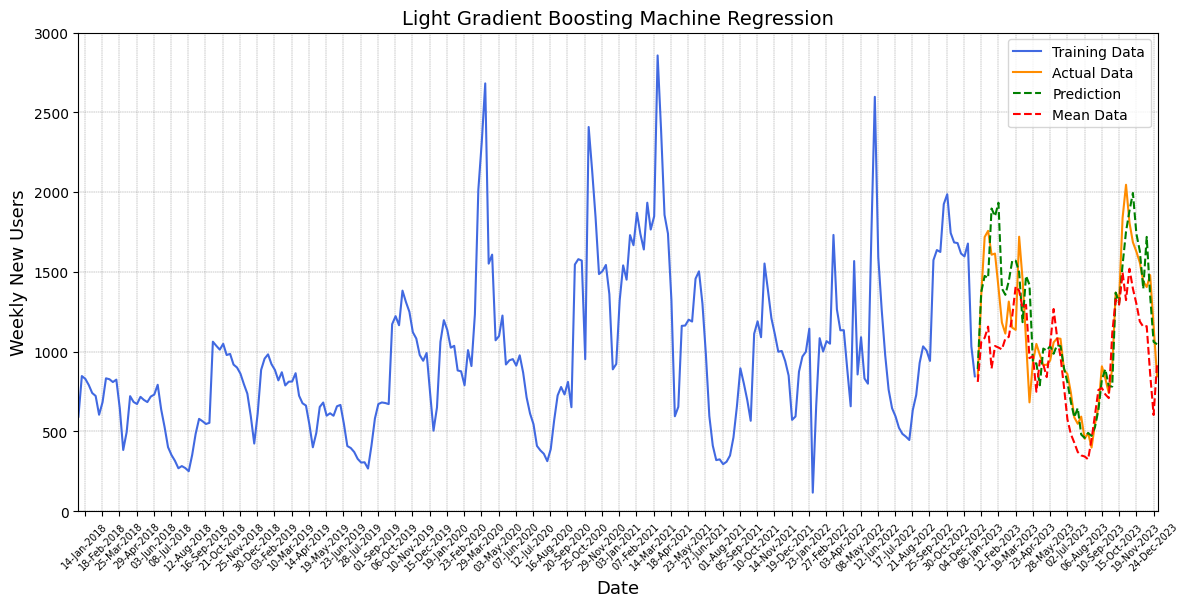

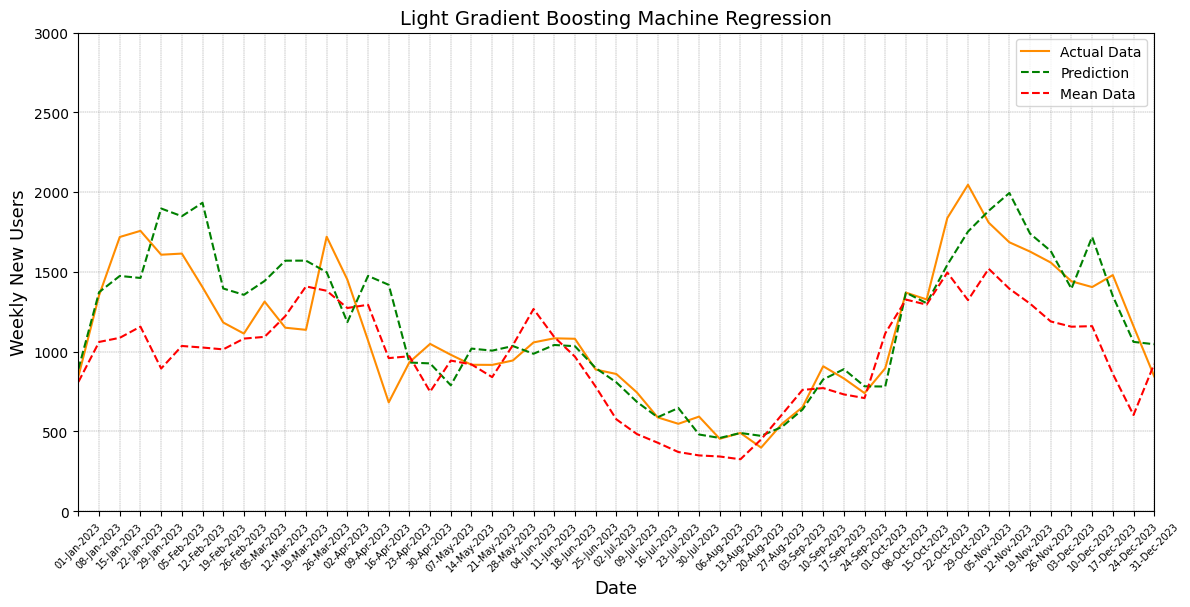

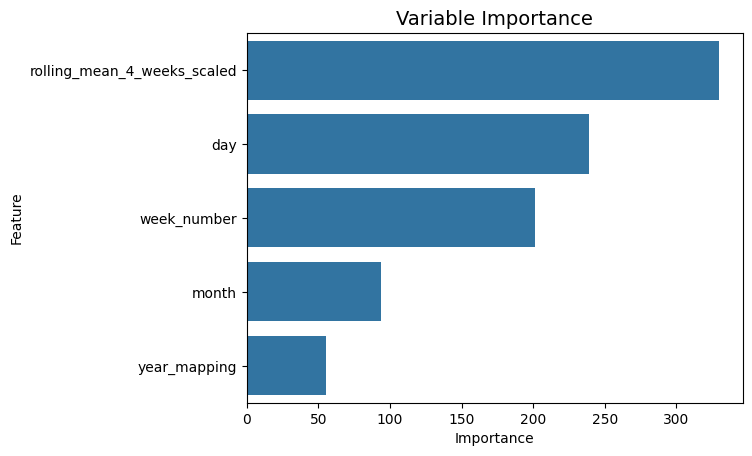

In [ ]:
#Prediction Algorithm

from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import seaborn as sns
import datetime
import matplotlib.dates as mdates
import random
from sklearn.model_selection import train_test_split

def train_time_series_with_folds(weekly_data):

    X = weekly_data.drop('New Users', axis=1)
    y = weekly_data['New Users']

    X_train = X.iloc[:-53]
    X_test = X.iloc[-53:]
    y_train = y.iloc[:-53]
    y_test =  y.iloc[-53:]

    '''##### Check #####
    print("X_train\n",X_train.head(20))
    print("Y_train\n", y_train.head(20))
    print("X_test\n",X_test.head(20))
    print("Y_test\n", y_test.head(20))
    ##### Check #####'''

    #Create, train and do inference of the model
    random_state = random.randint(0, 9999)
    model = LGBMRegressor(random_state=random_state)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    #Plot reality vs prediction for almost 12 months of the dataset
    fig = plt.figure(figsize=(12,6))

    test_dates = pd.date_range(start='2023-01-01', end='2023-12-31', freq="7D")
    weekly_dates = pd.date_range(start='2018-01-01', end='2023-01-01', freq="7D")
    #print("Test_dates:\n ", test_dates)

    #Calculate MAE
    mae = np.round(mean_absolute_error(y_test, predictions), 3)
    print("MAE(test - prediction) =", mae)
    mae2 = np.round(mean_absolute_error(y_test, weekly_means), 3)
    print("MAE(test - weekly means) =", mae2)

    #Calculate RMSE
    rmse = mean_squared_error(y_test, predictions, squared=False)
    print("RMSE(test - prediction) =", rmse)
    rmse2 = mean_squared_error(y_test, weekly_means, squared=False)
    print("RMSE(test - weekly_means) =", rmse2)

    plt.plot(weekly_dates, weekly_data['New Users'][:len(weekly_data)-53+1], label='Training Data', color='royalblue')
    plt.plot(test_dates, y_test, color='darkorange', label='Actual Data',linestyle='solid')
    plt.plot(test_dates, predictions, color='green', linestyle='--', label='Prediction')
    plt.plot(week_mean_dates, weekly_means, color='red', linestyle='--', label='Mean Data')

    #Plot the Diagram
    plt.xlabel('Date', fontsize=13)
    plt.ylabel('Weekly New Users', fontsize=13)
    plt.legend()
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%b-%Y'))
    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=7*5))
    plt.xticks(rotation=45, fontsize = 7)
    plt.xlim([pd.Timestamp('2018-01-01'), pd.Timestamp('2024-01-01')])
    plt.ylim(0, 3000)
    plt.tight_layout()
    plt.grid(color='grey', linestyle='--', linewidth=0.3)
    plt.title('Light Gradient Boosting Machine Regression', fontsize=14)
    plt.show()

    fig = plt.figure(figsize=(12,6))

    plt.plot(test_dates, y_test, color='darkorange', label='Actual Data',linestyle='solid')
    plt.plot(test_dates, predictions, color='green', linestyle='--', label='Prediction')
    plt.plot(week_mean_dates, weekly_means, color='red', linestyle='--', label='Mean Data')

    #Plot the Diagram
    plt.xlabel('Date', fontsize=13)
    plt.ylabel('Weekly New Users', fontsize=13)
    plt.legend()
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%b-%Y'))
    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=7))
    plt.xticks(rotation=45, fontsize = 7)
    plt.xlim([pd.Timestamp('2023-01-01'), pd.Timestamp('2023-12-31')])
    plt.ylim(0, 3000)
    plt.tight_layout()
    plt.grid(color='grey', linestyle='--', linewidth=0.3)
    plt.title('Light Gradient Boosting Machine Regression', fontsize=14)
    plt.show()

    #Create a dataframe with the variable importances of the model
    df_importances = pd.DataFrame({
        'Feature': model.feature_name_,
        'Importance': model.feature_importances_
    }).sort_values(by='Importance', ascending=False)

    #Plot variable importances of the model
    plt.title('Variable Importance', fontsize=14)
    sns.barplot(x=df_importances.Importance, y=df_importances.Feature, orient='h')
    plt.show()

train_time_series_with_folds(weekly_data)

<ipython-input-15-fd818b687ab7>:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  weekly_data['count_prev_weeks'].fillna(method='bfill', inplace=True)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000057 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 260, number of used features: 6
[LightGBM] [Info] Start training from score 963.047252
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

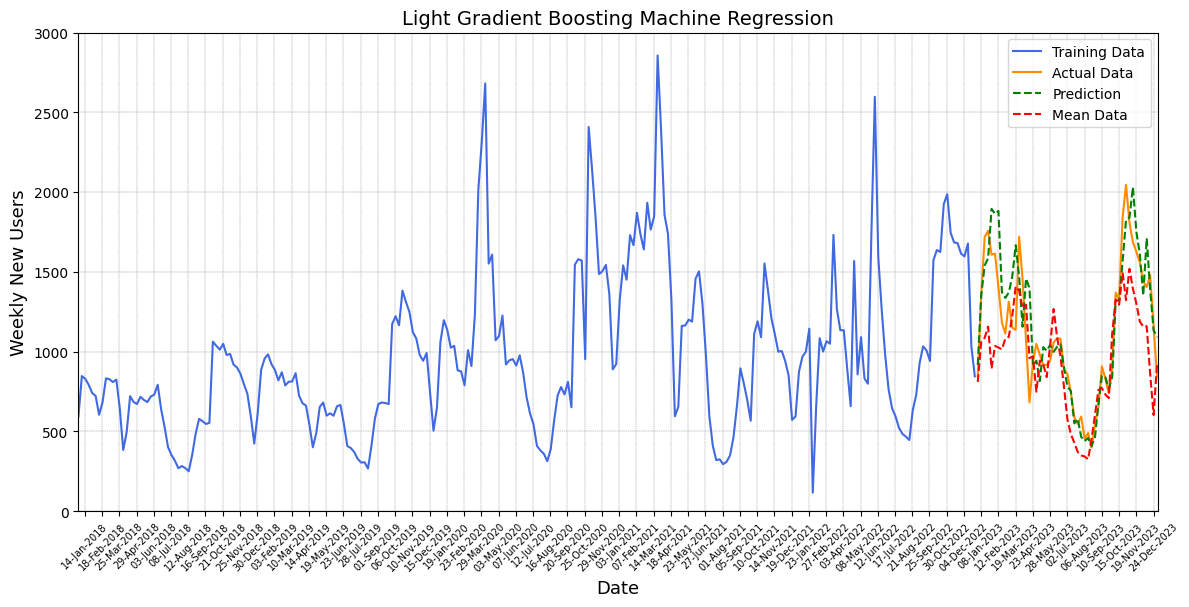

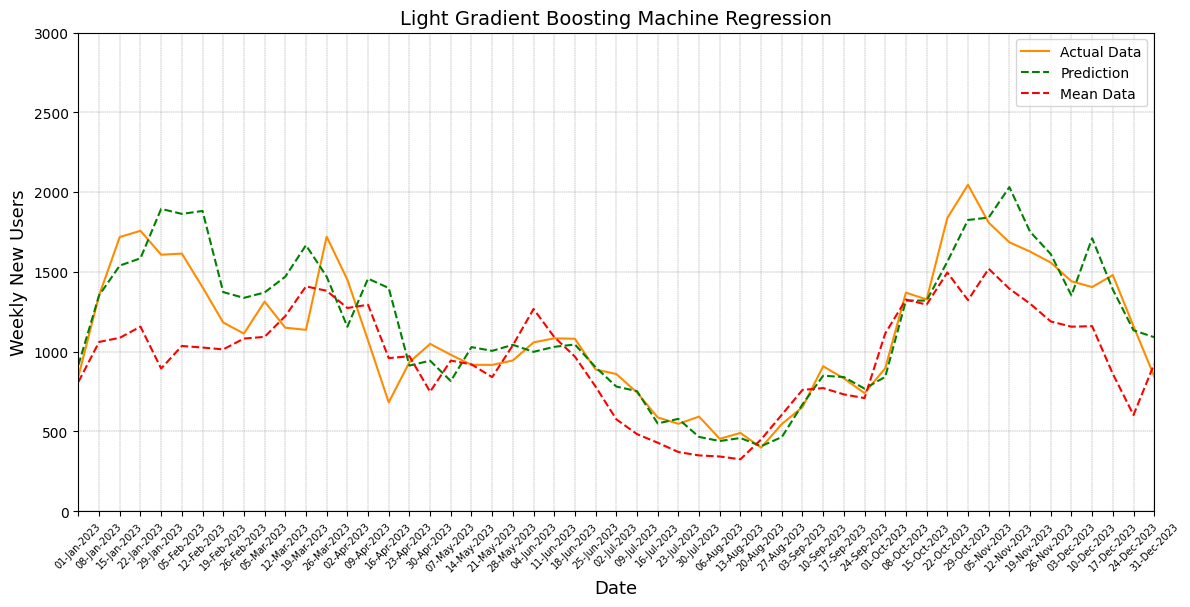

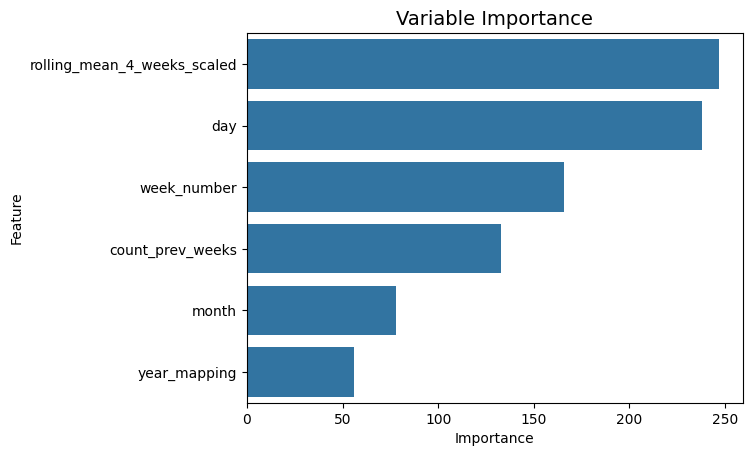

In [ ]:
# With Lags
weekly_data['count_prev_weeks'] = weekly_data['New Users'].shift(28)
weekly_data['count_prev_weeks'].fillna(method='bfill', inplace=True)
train_time_series_with_folds(weekly_data)

####Experiments With Parameters and Attributes

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np

df = pd.read_csv('UA & GA4 Kalippos_(1_1_18-31_12_23) New Users - Date_Time series.csv')

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%b-%y')

#print(df)

# Set 'Date' as the index
df.set_index('Date', inplace=True)

# Resample data to weekly frequency
weekly_data = df.resample('W').mean()

weekly_data.reset_index(inplace=True)

#print(weekly_data)

#Convert datetime from object to datetime type
weekly_data['Date'] = pd.to_datetime(weekly_data['Date'])

#Create year, day and month variables
weekly_data['year'] = weekly_data['Date'].dt.year
weekly_data['day'] = weekly_data['Date'].dt.day
weekly_data['month'] = weekly_data['Date'].dt.month

### New Columns ###

#1#
#Column that contains mapping for the year e.g. 2018 -> 1, 2019 -> 2, ...
year_mapping = {2018: 1, 2019: 2, 2020: 3, 2021: 4, 2022: 5, 2023: 6}
weekly_data['year_mapping'] = weekly_data['year'].replace(year_mapping)

#2#
weekly_data['week_number'] = weekly_data['Date'].dt.isocalendar().week

#3#
#Column that contains scaled data for the mean of rolling window (size = 4), 4*7 days
weekly_data['rolling_mean_4_weeks'] = weekly_data['New Users'].rolling(window=4).mean()
weekly_data.fillna(method='bfill', inplace=True)
scaler = MinMaxScaler()
rolling_mean_4_weeks = weekly_data['rolling_mean_4_weeks'].to_numpy().reshape(-1, 1)
weekly_data['rolling_mean_4_weeks_scaled'] = scaler.fit_transform(rolling_mean_4_weeks)
weekly_data.drop('rolling_mean_4_weeks', axis=1, inplace=True)

#### Check Mean #####
weekly_data['week'] = weekly_data['Date'].dt.isocalendar().week

# Filter data for years 2018-2022
weekly_data_filtered = weekly_data[weekly_data['year'] <= 2022]

# Group by week and calculate mean values for each week across the specified years
weekly_means = weekly_data_filtered.groupby(['week'])['New Users'].mean().reset_index()
weekly_means.drop('week', axis=1, inplace=True)
weekly_data.drop('week', axis=1, inplace=True)
# Generate dates for weekly means for the year 2023
week_mean_dates = pd.date_range(start='2023-01-01', end='2023-12-31', freq="7D")
#print("Week Mean Dates\n", week_mean_dates)
#### Check Mean #####

weekly_data.drop('Date', axis=1, inplace=True)
weekly_data.drop('year', axis=1, inplace=True)

<ipython-input-81-cf068e7995b4>:43: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  weekly_data.fillna(method='bfill', inplace=True)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error

# Split the data into features and target
X = weekly_data.drop('New Users', axis=1)
y = weekly_data['New Users']

X_train = X.iloc[:-53]
X_test = X.iloc[-53:]
y_train = y.iloc[:-53]
y_test =  y.iloc[-53:]

# Function to train and evaluate a model
def train_evaluate_model(params, X_train, y_train, X_test, y_test):
    model = LGBMRegressor(**params)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    score = np.round(mean_absolute_error(y_test, predictions), 3)
    return score


In [ ]:
# Experiments

def param_change():
  param_list = [
  {},
  {'n_estimators': 200, 'learning_rate': 0.05, 'num_leaves': 50, 'max_depth': 10},
  {'n_estimators': 300, 'learning_rate': 0.025, 'num_leaves': 60, 'max_depth': 12},
  {'n_estimators': 350, 'learning_rate': 0.02, 'num_leaves': 62, 'max_depth': 14},
  {'n_estimators': 370, 'learning_rate': 0.015, 'num_leaves': 64, 'max_depth': 16}
  ]

  for i, params in enumerate(param_list):
      score = train_evaluate_model(params, X_train, y_train, X_test, y_test)
      column_names = X_train.columns
      print(f"\033[1mModel {chr(65 + i)}:\033[0m\n")
      print("Algorithm:\n LGBMRegressor\n")
      print("Parameters:")
      if params != {}:
        print("",', '.join(params.keys()))
      else:
        print(" Default")
      print("\n")
      print("Train Dataset Attributes:\n",', '.join(column_names))
      print("\n")
      print("Score - MAE(test - prediction):\n", score)
      print("\n")

param_change()


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000054 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 192
[LightGBM] [Info] Number of data points in the train set: 260, number of used features: 5
[LightGBM] [Info] Start training from score 963.047252
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

In [ ]:
# Experimenting with different feature sets
# Dropping 'week_number' and seeing its impact

X_alt = X.drop('week_number', axis=1)
y_alt = weekly_data['New Users']

X_train = X_alt.iloc[:-53]
X_test = X_alt.iloc[-53:]
y_train = y_alt.iloc[:-53]
y_test =  y_alt.iloc[-53:]

param_change()

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000049 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 138
[LightGBM] [Info] Number of data points in the train set: 260, number of used features: 4
[LightGBM] [Info] Start training from score 963.047252
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

In [ ]:
 # Dropping 'rolling_mean_4_weeks_scaled' and seeing its impact
X_alt = X.drop('rolling_mean_4_weeks_scaled', axis=1)
y_alt = weekly_data['New Users']

X_train = X_alt.iloc[:-53]
X_test = X_alt.iloc[-53:]
y_train = y_alt.iloc[:-53]
y_test =  y_alt.iloc[-53:]

param_change()

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000033 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 105
[LightGBM] [Info] Number of data points in the train set: 260, number of used features: 4
[LightGBM] [Info] Start training from score 963.047252
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

In [ ]:
# Dropping 'rolling_mean_4_weeks_scaled' 'week_number' and and seeing its impact

X_alt = X.drop(['rolling_mean_4_weeks_scaled','week_number'], axis=1)
y_alt = weekly_data['New Users']

X_train = X_alt.iloc[:-53]
X_test = X_alt.iloc[-53:]
y_train = y_alt.iloc[:-53]
y_test =  y_alt.iloc[-53:]

param_change()

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000048 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 51
[LightGBM] [Info] Number of data points in the train set: 260, number of used features: 3
[LightGBM] [Info] Start training from score 963.047252
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be